# 🫀 Heart Disease Detection using Logistic Regression

# Import Library

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Baca Data dan Preprocessing Awal

In [65]:
# Misalnya kamu sudah load data ke df
# df = pd.read_csv('heart.csv') <- atau dari sumber lainnya

# Ganti '?' dengan NaN
df.replace('?', np.nan, inplace=True)

# Konversi kolom 11 dan 12 ke numerik (karena awalnya bertipe object)
df[11] = pd.to_numeric(df[11], errors='coerce')
df[12] = pd.to_numeric(df[12], errors='coerce')

# Pisahkan fitur dan label
X = df.drop(13, axis=1)
y = df[13]


##  Imputasi & Split Data

In [66]:
# Imputasi median untuk nilai NaN
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


## Standardisasi

In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Latih Model Logistic Regression

In [68]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

## Evaluasi Model

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.38      0.25      0.30        12
           2       0.22      0.22      0.22         9
           3       0.17      0.29      0.21         7
           4       0.00      0.00      0.00         4

    accuracy                           0.54        61
   macro avg       0.32      0.33      0.32        61
weighted avg       0.51      0.54      0.52        61



c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

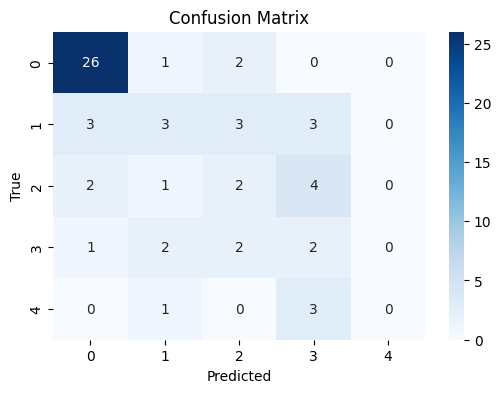

In [69]:
y_pred = model.predict(X_test_scaled)

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
